In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd



In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GOOG.csv")

In [10]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,37.150002,37.202999,36.562901,37.091999,37.091999,65456000
1,2016-01-05,37.322498,37.599998,36.931999,37.129002,37.129002,39014000
2,2016-01-06,36.500000,37.359001,36.445999,37.181000,37.181000,38940000
3,2016-01-07,36.515499,36.924999,35.952999,36.319500,36.319500,59274000
4,2016-01-08,36.572498,36.661499,35.650002,35.723499,35.723499,49018000
...,...,...,...,...,...,...,...
1000,2019-12-23,67.793503,67.989998,67.325500,67.442001,67.442001,17662000
1001,2019-12-24,67.425003,67.513000,67.139000,67.178001,67.178001,6950000
1002,2019-12-26,67.308502,68.066353,67.223503,68.019997,68.019997,13350000
1003,2019-12-27,68.149498,68.226501,67.465500,67.594498,67.594498,20768000


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1005 non-null   object 
 1   Open       1005 non-null   float64
 2   High       1005 non-null   float64
 3   Low        1005 non-null   float64
 4   Close      1005 non-null   float64
 5   Adj Close  1005 non-null   float64
 6   Volume     1005 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.1+ KB


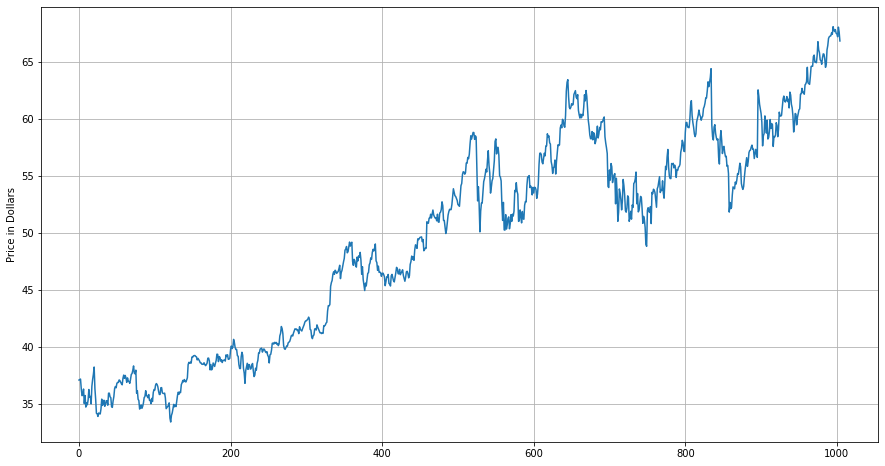

In [12]:
df["Close"].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price in Dollars")

plt.show()

In [13]:
df["50_SMA"] = df["Close"].rolling(window = 50, min_periods = 1).mean()

In [14]:
df["200_SMA"] = df["Close"].rolling(window = 200, min_periods = 1).mean()

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_SMA,200_SMA
0,2016-01-04,37.150002,37.202999,36.562901,37.091999,37.091999,65456000,37.091999,37.091999
1,2016-01-05,37.322498,37.599998,36.931999,37.129002,37.129002,39014000,37.110501,37.110501
2,2016-01-06,36.500000,37.359001,36.445999,37.181000,37.181000,38940000,37.134000,37.134000
3,2016-01-07,36.515499,36.924999,35.952999,36.319500,36.319500,59274000,36.930375,36.930375
4,2016-01-08,36.572498,36.661499,35.650002,35.723499,35.723499,49018000,36.689000,36.689000


In [16]:
df['Signal'] = 0.0
df['Signal'] = np.where(df["50_SMA"]>df["200_SMA"],1.0,0.0)

In [17]:
df['Position']=df['Signal'].diff()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_SMA,200_SMA,Signal,Position
0,2016-01-04,37.150002,37.202999,36.562901,37.091999,37.091999,65456000,37.091999,37.091999,0.0,NaN
1,2016-01-05,37.322498,37.599998,36.931999,37.129002,37.129002,39014000,37.110501,37.110501,0.0,0.0
2,2016-01-06,36.500000,37.359001,36.445999,37.181000,37.181000,38940000,37.134000,37.134000,0.0,0.0
3,2016-01-07,36.515499,36.924999,35.952999,36.319500,36.319500,59274000,36.930375,36.930375,0.0,0.0
4,2016-01-08,36.572498,36.661499,35.650002,35.723499,35.723499,49018000,36.689000,36.689000,0.0,0.0


In [18]:
df.Position.isna().sum()


1

In [19]:
df.Position.fillna(0)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1000    0.0
1001    0.0
1002    0.0
1003    0.0
1004    0.0
Name: Position, Length: 1005, dtype: float64

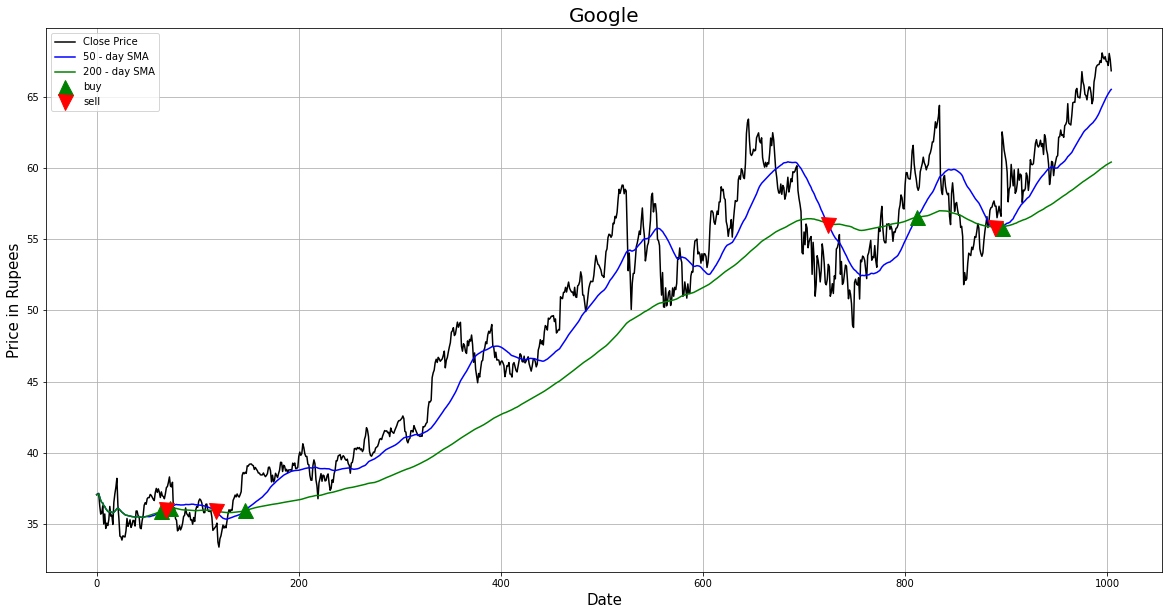

In [20]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df["Close"].plot(color = "k", label= "Close Price") 
df["50_SMA"].plot(color = "b",label = "50 - day SMA") 
df["200_SMA"].plot(color = "g", label = "200 - day SMA")
# plot ‘buy’ signals
plt.plot(df[df["Position"] == 1].index, 
         df["50_SMA"][df["Position"] == 1], 
         "^", markersize = 15, color = "g", label = 'buy')
# plot ‘sell’ signals
plt.plot(df[df["Position"] == 0].index, 
         df["50_SMA"][df["Position"] == 0], 
         "v", markersize = 15, color = "r", label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Google', fontsize = 20)
plt.legend()
plt.grid()
plt.show()